![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)


In [4]:
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
bikes.shape
#bikes.dtypes

(10886, 12)

In [7]:
# Celda 1.1
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [8]:
# Celda 1.2
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


In [9]:
# Celda 1.2
bikes.groupby('hour').total.count().mean()


453.5833333333333

## Análisis Descriptivo

## Variable Hour


La variable Hour corresponde a una variable categórica, representa la hora en que fue rentada la bicicleta. Al analizar sus variables descriptivas se obtienen los siguientes resutlados:

- El número de alquileres de bicicletas por hora se encuentra entre 433 y 456 con una media de 453 alquileres por hora en el conjunto de datos.


- Entre las horas de las 1 hasta las 7 de la mañana se alquila mínimo una bicicleta , el máximo de alquileres es de 977  bicicletas a las 6 de la tarde, seguido de 970 alquileres a las 5 de la tarde. 


## Variable season

La variable season corresponde a una variable categórica, representa la temporada en que fue rentada la bicicleta, en donde 1 corresponde a invierno, 2:primavera, 3:verano y  4:otoño. al analizar sus estadíticas descriptivas se observa lo siguiente:

- Durante el invierno se rentaron 2686 bicicletas, para la temporada de otoño 2734 bicicletas, mientras que en primavera y verano se alquilaron 2733. 

- En la temporada de verano se alquilan en promedio 234 bicicletas, mientras que en invierno se alquilan alrededor de 116 bicicletas. 

- El mínimo de biciletas alquiladas en las 4 temporadas es de una bicicleta, mientras que en verano se alquilaron el máximo de bicicletas con un total de 977.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

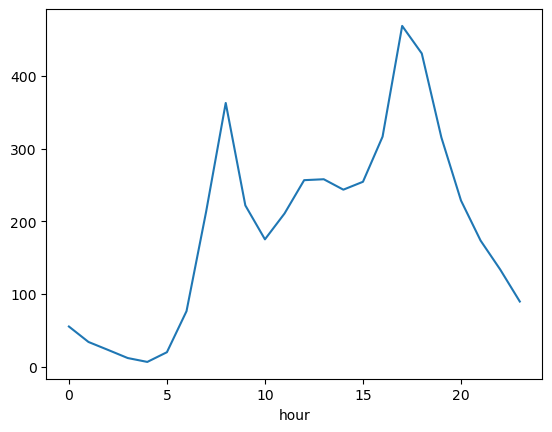

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

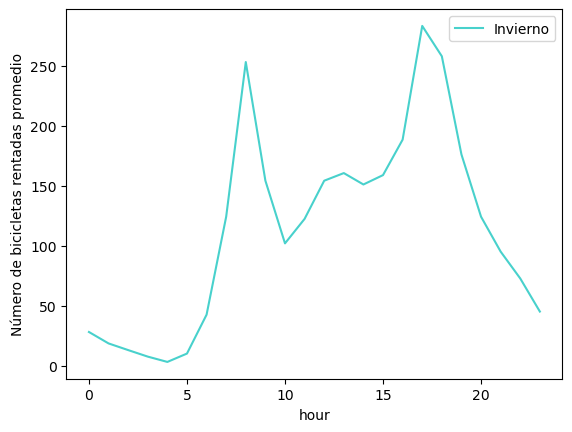

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtrar datos para invierno
bikes_invierno = bikes[bikes['season'] == 1]

# Agrupar datos por hora y calcular el promedio
bikes_invierno_hora =bikes_invierno.groupby('hour')['total'].mean()

# Graficar resultados
plt.plot(bikes_invierno_hora.index, bikes_invierno_hora.values, color='mediumturquoise', label='Invierno')

plt.xlabel('hour')
plt.ylabel('Número de bicicletas rentadas promedio')
plt.legend()
plt.show()

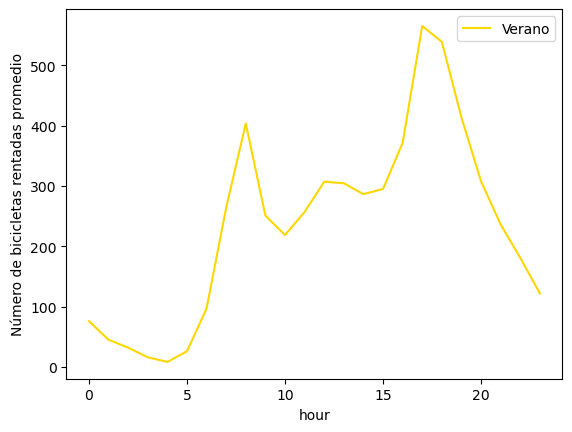

In [12]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Filtrar datos para invierno y verano
bikes_verano = bikes[bikes['season'] == 3]

# Agrupar datos por hora y calcular el promedio
bikes_verano_hora = bikes_verano.groupby('hour')['total'].mean()

# Graficar resultados
plt.plot(bikes_verano_hora.index, bikes_verano_hora.values,color='gold', label='Verano')
plt.xlabel('hour')
plt.ylabel('Número de bicicletas rentadas promedio')
plt.legend()
plt.show()

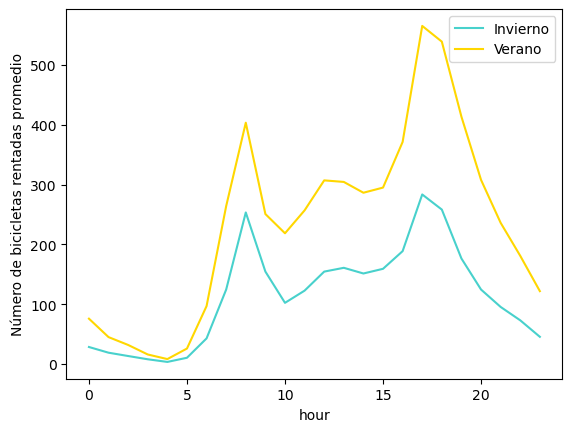

In [13]:

# Graficar resultados
plt.plot(bikes_invierno_hora.index, bikes_invierno_hora.values, color='mediumturquoise', label='Invierno')
plt.plot(bikes_verano_hora.index, bikes_verano_hora.values,color='gold', label='Verano')

plt.xlabel('hour')
plt.ylabel('Número de bicicletas rentadas promedio')
plt.legend()
plt.show()

## principales Hallazgos

Al analizar el comportamiento para la temporada de invierno y verano, se evidencia que tienen un comportamiento muy similar, entre las horas 1 y 5 de la mañana, tienden a tener aproximadamente muy cerca el número promedio de bicicletas rentadas, después de las 5 de la mañana, se muestra que aumenta de manera significativa la cantidad promedio de bicicletas alquiladas, alcanzando un pico aproximadamente a las 8 de la mañana, sin embargo, en la temporada de verano es aún mayor el crecimiento; al pasar el día siguen teniendo el mismo comportamiento y manteniendo la brecha, alrededor de las 6 de la tarde, se vuelve a tener un aumento considerablemente el promedio de las bicicletas alquiladas durante las dos temporadas. 


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [14]:

X = bikes.loc[:, ['season', 'hour']]
X = pd.get_dummies(X, columns = ['season'], drop_first = True)
y = bikes.loc[:, 'total']


In [15]:
X.head()

,hour,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,0,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,2,0,0,0
2011-01-01 03:00:00,3,0,0,0
2011-01-01 04:00:00,4,0,0,0


In [16]:
#Separación de las variables predictoras y de la variable de respuesta en un conjunto de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [17]:
#Implementación y ajuste del modelo de regresión con las datos de entrenamiento
reg_lineal = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred = reg_lineal.predict(X)
y_pred

array([ -7.67132343,   3.01635417,  13.70403176, ..., 307.40761154,
       318.09528914, 328.78296673])

In [19]:
print('Coeficientes: \n', reg_lineal.coef_)
print('Intercepto: \n', reg_lineal.intercept_)

Coeficientes: 
 [ 10.6876776   99.03019821 115.71036692  90.63770541]
Intercepto: 
 -7.67132343260829


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("MSE: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coeficiente de Determinación: %.2f" % r2_score(y, y_pred))
# Evaluación del error de predicción, utilizando el RMSE, de las observaciones del conjunto de prueba
print(f'\nEl RMSE del modelo de regresión es de {round(np.sqrt(mean_squared_error(reg_lineal.predict(X_test), y_test)))}')

MSE: 25496.88
Coeficiente de Determinación: 0.22

El RMSE del modelo de regresión es de 159


## Descripción del proceso realizado:

Al realizar la estimación del modelo de regresión lineal se hallan los coeficientes de 10.52 para la varibale "hour", lo que indica que a medida que transcurre cada hora durante el día, aproximadamente se alquilan alrededor de 11 bicicletas. Por otro lado, si la temporada es primavera se rentan alrededor de 99 bicicletas, en caso de que sea verano aumenta a 115 y si es otoño se rentan aproximadamente 91. 

Entres las principales limitaciones de la regresión lineal es que los valores atípicos pueden afectar los resultados del modelo,también son modelos que son poco flexibles, están sesgados, además, es necesario realizar modificaciones a las variables categóricas para poder introducirlas en el modelo, por último, las estimaciones pueden tener problemas de varianza, lo cual repercute en problemas para realizar estadística inferencial (pruebas de hipótesis e intervalos de confianza).


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando manualmente sobre las variables "hour" y "season". El árbol debe tener al menos 6 nodos finales.

In [21]:
# Celda 4

#Se seleccionan las variables explicativas y la variable dependiente
# Se realiza la transformación de la variable respuesta para ser binaria
X = bikes.loc[:, ['season', 'hour']]
y = bikes.loc[:, 'total']
y = (bikes.total > y.median()).astype(int)

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean() ** 2 + (1 - y.mean()) ** 2)

In [22]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~ filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_


In [30]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct = 10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct + 1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [26]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level = 0, min_gain = 0.001, max_depth = None, num_pct = 10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred = y.iloc[:1].values[0], y_prob = 0.5, level = level, split = -1, n_samples = 1, gain = 0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5)
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace
    
    tree = dict(y_pred = y_pred, y_prob = y_prob, level = level, split = -1, n_samples = X.shape[0], gain = gain)
    
    # Revisar el criterio de parada
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree

        # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~ filter_l], y.loc[~ filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain = min_gain, max_depth = max_depth, num_pct = num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain = min_gain, max_depth = max_depth, num_pct = num_pct)
    
    return tree

In [27]:
# Aplicación de la función tree_grow
tree = tree_grow(X, y, level = 0, min_gain = 0.001, max_depth = 6, num_pct = 10)

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'
def tree_predict(X, tree, proba = False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~ filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continúa con el derecho 
            predicted[~ filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continúa con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [28]:
tree

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 0.06425451863089747,
  'sl': {'y_pred': 0,
   'y_prob': 0.026106335561922954,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 0.0027878761479700337,
   'sl': {'y_pred': 0,
    'y_prob': 0.010796723752792257,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 0.0008089140964271449},
   'sr': {'y_pred': 0,
    'y_prob': 0.11816192560175055,
    'level': 3,
    'split': [0, 3.0],
    'n_samples': 455,
    'gain': 0.009214309359181827,
    'sl': {'y_pred': 0,
     'y_prob': 0.05240174672489083,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 227,
     'gain': 0.004655188204359839,
     'sl': {'y_pred': 0,
      'y_prob': 0.008695652173913044,
      'level': 5,
      'split': -1,
      'n_samples': 1

In [32]:
# Ejecución de función tree_predict
print(tree_predict(X, tree))

[0. 0. 0. ... 1. 0. 0.]


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [36]:
# Celda 5

#Se seleccionan las variables explicativas y la variable dependiente
X = bikes.loc[:, ['season', 'hour']]
y = bikes.loc[:, 'total']

# Separación de las variables predictoras y de la variable de respuesta en un conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


(0.61, 20)

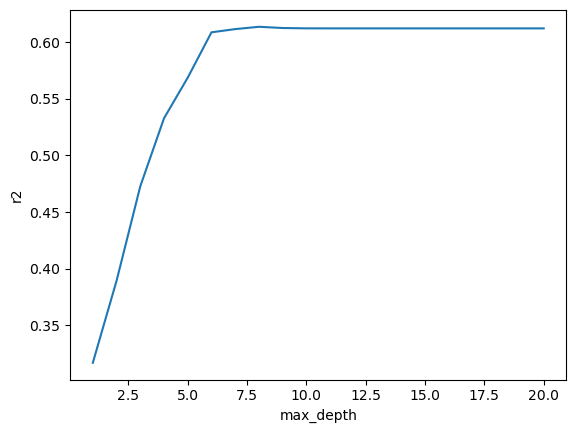

In [41]:

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del r2 para cada valor de máxima profundidad
r2_scores = []

# Bucle para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    tree_reg = DecisionTreeRegressor(max_depth = depth, random_state = 1)
    r2_scores.append(cross_val_score(tree_reg, X_train, y_train, cv = 10, scoring = 'r2').mean())

# Gráfica max_depth versus r2
plt.plot(max_depth_range, r2_scores)
plt.xlabel('max_depth')
plt.ylabel('r2')

# Mejor r2 (desempeño del modelo) y su correspondiente max_depth
sorted(zip(np.round(r2_scores, 2), max_depth_range))[-1]

In [38]:
# max_depth = 20 fue el mejor, se ajusta un árbol usando este valor 
reg = DecisionTreeRegressor(max_depth = 20, random_state = 1).fit(X_train, y_train)

# Evaluación del error de predicción de las observaciones del set de test
round(np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

117

## Conclusiones

Al realizar la estimación del árbol con la  librería sklearn, se obtiene que la mejor estimación se da con una profundidad de 20, con un valor de 0.61. El RMSE obtenido con la máxima profundidad es de 117, lo cual indica que el modelo tiene un mejor desempeño que el obtenido por el modelo de regresión lineal, el cual se obtuvo un RMSE de 159. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [43]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [44]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [45]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [69]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [70]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del Accuracy para cada valor de máxima profundidad
accuracy_scores = []

# Bucle para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf_6 = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    accuracy_scores.append(cross_val_score(clf_6, X_train, y_train, cv = 10, scoring = 'accuracy').mean())

# Lista para guardar los valores del F1-Score para cada valor de máxima profundidad
f1_scores = []

# Bucle para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf_tree = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    f1_scores.append(cross_val_score(clf_tree, X_train, y_train, cv = 10, scoring = 'f1').mean())


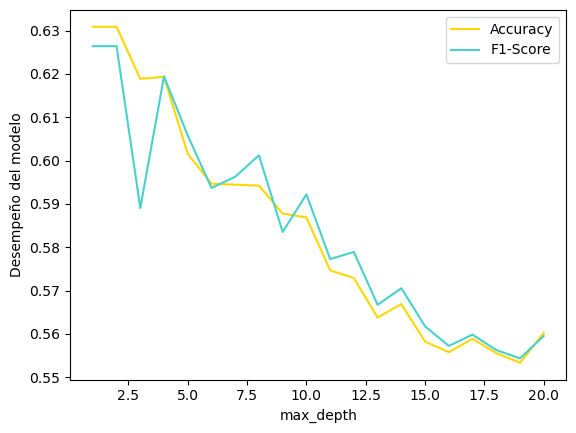

In [73]:
# Gráfica max_depth versus Accuracy and F1-Score (desempeño del modelo)
plt.plot(max_depth_range, accuracy_scores, label = 'Accuracy', color = 'gold')
plt.plot(max_depth_range, f1_scores, label = 'F1-Score', color = 'mediumturquoise')
plt.xlabel('max_depth')
plt.ylabel('Desempeño del modelo')
plt.legend()


In [77]:
# Mejor Accuracy y F1-Score (desempeño del modelo) y su correspondiente max_depth
print(f'Métrica Accuracy: {sorted(zip(np.round(accuracy_scores, 4), max_depth_range))[-1]}')
print(f'\nMétrica F1-Score: {sorted(zip(np.round(f1_scores, 4), max_depth_range))[-1]}')

Métrica Accuracy: (0.6309, 2)

Métrica F1-Score: (0.6264, 2)


In [78]:
# Datos de entrenamiento
regre_logist = LogisticRegression().fit(X_train, y_train)

# Evaluación del desempeño con las métricas Accuracy y F1-Score
print(round(metrics.accuracy_score(regre_logist.predict(X_test), y_test), 3),
      round(metrics.f1_score(regre_logist.predict(X_test), y_test), 3))

0.614 0.611


## Conclusiones

Al comparar el modelo de arboles de decisión y de Regresión logistica teniendo en cuenta las métricas de Accuracy y el F1-Score, se obtiene que los arboles de decisión teniendo en cuenta una profundida máxima de 2, presenta un mejor desempeño frente al modelo de regresión logística, puesto que obtuvo un resultado de Accuracy: 0.6309 y F1-Score:0.6264, cifras superiores a los encontrados en el modelo de regresión logística (Accuracy: 0.614 y F1-Score:0.611). 


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [46]:
# Celda 7
# Proporciones de las diferentes clases de variable de interés (y)
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,3000,0.5
0,3000,0.5


In [48]:
#max_depth = 2
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier( max_depth=2,random_state=0,),
                              n_estimators=100,
                              max_samples=300,
                              bootstrap=True,
                              random_state=42,n_jobs=-1, oob_score=True)

In [49]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('max_depth = 2: ',metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

max_depth = 2:  0.631578947368421 0.6453333333333333


In [52]:
# Se ajusta un modelo de clasificación compuesto por 300 muestras bagged con 100 árboles de decisión y un
# min_samples_split igual que 100
clf_2 = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf = 100),
                             n_estimators = 100,
                             bootstrap = True,
                             random_state = 42,
                             n_jobs = -1,
                             oob_score = True,
                             max_samples = 300).fit(X_train, y_train)


In [53]:
# Predicción y desempeño al hacer votación mayoritaria
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
print('min_samples_leaf: ',metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

min_samples_leaf:  0.6408689748811949 0.6473333333333333


In [51]:
#100 regresiones logisticas
from sklearn.linear_model import LogisticRegression
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('100 regresiones logisticas: ',metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

100 regresiones logisticas:  0.613099257258609 0.618


## Resultados  - metodología de Votación mayoritaria              
                 
### Accuracy    
|Tree_max_depth:0.6453    |    Tree_min_samples_leaf:0.6473     |     Regresión Logística: 0.618
  

### F1_Score

|Tree_max_depth:0.6316    |    Tree_min_samples_leaf: 0.6409     |     Regresión Logística: 0.6131

- De acuerdo con los resultados mostrados anteriormente, realizando un esamble con la metodología de Votación mayoritaria compuesto por 300 muestras bagged con 100 árboles de decisión, el escenario min_samples_leaf tomando un valor de 100, es el modelo que obtiene los mayores valores en las métricas del Accuracy: 0.6473 y F1_Score: 0.6409, lo que indica que es el modelo con el mejor desempeño en este caso.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [54]:
# Celda 8
#max_depth = 2
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier( max_depth=2,random_state=0,),
                              n_estimators=100,
                              max_samples=300,
                              bootstrap=True,
                              random_state=42,n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
print('Votación Ponderada - max_depth = 2: ',metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

Votación Ponderada - max_depth = 2:  0.6324549237170597 0.6466666666666666


In [59]:
#min_samples_leaf:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier( min_samples_leaf = 100,random_state=0,),
                              n_estimators=100,
                              max_samples=300,
                              bootstrap=True,
                              random_state=42,n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
print('Votación ponderada - min_samples_leaf = 100: ',metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

Votación ponderada - min_samples_leaf = 100:  0.641200545702592 0.6493333333333333


In [56]:
#100 regresiones logisticas
from sklearn.linear_model import LogisticRegression
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
print('Votación Ponderada - 100 regresiones logisticas: ',metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)) 

Votación Ponderada - 100 regresiones logisticas:  0.6116373477672531 0.6173333333333333


## Resultados  - metodología de Votación Ponderada              
                 
### Accuracy    
|Tree_max_depth:0.6467    |    Tree_min_samples_leaf:0.6493     |     Regresión Logística: 0.6173
  

### F1_Score

|Tree_max_depth:0.6325    |    Tree_min_samples_leaf: 0.6412     |     Regresión Logística: 0.6116

- De acuerdo con los resultados mostrados anteriormente, realizando un esamble con la metodología de Votación ponderada compuesto por 300 muestras bagged con 100 árboles de decisión, el escenario min_samples_leaf tomando un valor de 100, es el modelo que obtiene los mayores valores en las métricas del Accuracy: 0.6493 y F1_Score: 0.6412, lo que indica que es el modelo con el mejor desempeño en este caso.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Conclusiones
       
                 
### Accuracy  -  metodología de Votación mayoritaria
|Tree_max_depth:0.6453    |    Tree_min_samples_leaf:0.6473     |     Regresión Logística: 0.618

### Accuracy -  metodología de Votación Ponderada
|Tree_max_depth:0.6467    |    Tree_min_samples_leaf:0.6493     |     Regresión Logística: 0.6173
 
 



### F1_Score - metodología de Votación mayoritaria

|Tree_max_depth:0.6316    |    Tree_min_samples_leaf: 0.6409     |     Regresión Logística: 0.6131

### F1_Score -  -  metodología de Votación Ponderada

|Tree_max_depth:0.6325    |    Tree_min_samples_leaf: 0.6412     |     Regresión Logística: 0.6116

- Al realizar la comparación entre las dos metodologías implementadas por medio de las métricas de Accuracy y F1-Score, se evidencia que la metodología Ponderada presenta un mejor desempeño en los escenarios max_depth y min_samples_leaf con respecto a la votación mayoritaria.


- Entre las principales ventajas son que puedes ser implementados tanto para modelos de regresión como de clasificación, adicionalmente, son menos sensibles a obtener problemas de sobreajuste. Por otro lado, una de sus desventajas es que hay problemas para su ejecución de manera computacional, en términos de tiempo y uso de los recursos. 
